<a href="https://colab.research.google.com/github/JAVegaG/MCT_AI/blob/main/Project_1/the_gold_bug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scrapping - Parcial 01 - Python 101

## Web Data Manipulation

In [1]:
import re
import matplotlib
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
url = 'https://poestories.com/read/goldbug'
The_Gold_Bug_Raw = urllib.request.urlopen(url)
The_Gold_Bug_Html = The_Gold_Bug_Raw.read().decode('utf-8')
soup = BeautifulSoup(The_Gold_Bug_Html, 'html.parser')

In [4]:
The_Gold_Bug = soup.get_text()

In [5]:
pattern = '\n'
The_Gold_Bug = re.sub(pattern, 'ñññ', The_Gold_Bug)

In [6]:
pattern = '\xa0'
The_Gold_Bug = re.sub(pattern, ' ', The_Gold_Bug)

In [7]:
pattern = 'Menu.*?;|Print Version'
The_Gold_Bug_Clean = re.sub(pattern,'',The_Gold_Bug)

In [8]:
pattern = '.?adsbygoogle.*?scrollbars|NOTES.*?post.'
The_Gold_Bug_Clean = re.sub(pattern, '', The_Gold_Bug_Clean)

In [9]:
pattern = 'ñ{3,100}'
The_Gold_Bug_Clean = re.sub(pattern,'\n',The_Gold_Bug_Clean)

In [10]:
with open('The_Gold_Bug.txt', 'w') as external_file:
    print(The_Gold_Bug_Clean, file=external_file)
    external_file.close()

In [11]:
pattern = 'ñ{3,100}.*?The.*?the goat:|NOTES.*?scrollbars.'
The_Gold_Bug = re.sub(pattern,'',The_Gold_Bug)

In [12]:
pattern = 'ñ{3,100}'
The_Gold_Bug_Code = re.sub(pattern,'\n',The_Gold_Bug)
print(The_Gold_Bug_Code)

 
53‡‡†305))6*;4826)4‡.)4‡);80
6*;48†8¶60))85;1‡(;:‡*8†83(88)
5*†;46(;88*96*?;8)*‡(;485);5*†
2:*‡(;4956*2(5*-4)8¶8*;40692
85);)6†8)4‡‡;1(‡9;48081;8:8‡1
;48†85;4)485†528806*81(‡9;48
;(88;4(‡?34;48)4‡;161;:188;‡?;



In [13]:
with open('The_Gold_Bug_Code.txt', 'w') as external_file:
    print(The_Gold_Bug_Code, file=external_file)
    external_file.close()

In [14]:
pattern = '\)'
The_Gold_Bug_Code_Fix = re.sub(pattern,'>',The_Gold_Bug_Code)

pattern = '\('
The_Gold_Bug_Code_Fix = re.sub(pattern,'<',The_Gold_Bug_Code_Fix)

pattern = '\.'
The_Gold_Bug_Code_Fix = re.sub(pattern,'°',The_Gold_Bug_Code_Fix)

pattern = '\?'
The_Gold_Bug_Code_Fix = re.sub(pattern,'~',The_Gold_Bug_Code_Fix)

pattern = '\*'
The_Gold_Bug_Code_Fix = re.sub(pattern,'¿',The_Gold_Bug_Code_Fix)

pattern = ' '
secretCode = re.sub(pattern,'',The_Gold_Bug_Code_Fix)

print(secretCode)


53‡‡†305>>6¿;4826>4‡°>4‡>;80
6¿;48†8¶60>>85;1‡<;:‡¿8†83<88>
5¿†;46<;88¿96¿~;8>¿‡<;485>;5¿†
2:¿‡<;4956¿2<5¿-4>8¶8¿;40692
85>;>6†8>4‡‡;1<‡9;48081;8:8‡1
;48†85;4>485†528806¿81<‡9;48
;<88;4<‡~34;48>4‡;161;:188;‡~;



In [15]:
symbols = set()
for bug in secretCode:
  if (bug != ' ') & (bug != '\n'):
    symbols.add(bug)
  else:
    print('Removing unneccessary symbols')

print(symbols)

Removing unneccessary symbols
Removing unneccessary symbols
Removing unneccessary symbols
Removing unneccessary symbols
Removing unneccessary symbols
Removing unneccessary symbols
Removing unneccessary symbols
Removing unneccessary symbols
{':', '~', '<', '8', '0', '3', '¿', '†', '4', '9', '>', '‡', ';', '6', '1', '-', '¶', '2', '°', '5'}


In [16]:
freq_list = []
symbols_list = []

max_symbols = 0

for symbol in symbols:

  max_symbols += len(re.findall(symbol, secretCode))
  freq_list.append(len(re.findall(symbol, secretCode)))
  symbols_list.append(symbol)

  """
  dictionary['freq({0})'.format(symbol)] = len(re.findall(symbol,
                                                         secretCode))
  """

code_dictionary = {'Symbol' : symbols_list, 'Frequency' : freq_list}

In [17]:
code_df = pd.DataFrame(code_dictionary)

In [18]:
code_sorted_df = code_df.sort_values('Frequency',ascending=False)
code_sorted_df

,Symbol,Frequency
3,8,33
12,;,26
8,4,19
10,>,16
11,‡,16
6,¿,13
19,5,12
13,6,11
2,<,10
7,†,8


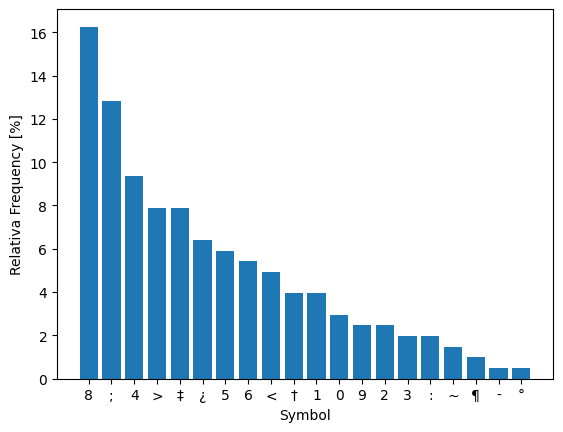

In [19]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#plt.hist(code_df.Frequency)
plt.bar(code_sorted_df.Symbol,code_sorted_df.Frequency.apply(lambda x : x*100/max_symbols))
plt.xlabel('Symbol')
plt.ylabel('Relativa Frequency [%]')
plt.show()
#plt.xticks(np.arange(min(code_df.Frequency), max(code_df.Frequency)+1, 1.0))

## Decipher the code

In [20]:
!git clone https://github.com/JAVegaG/MCT_AI.git

Cloning into 'MCT_AI'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 4), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [21]:
w_freq = pd.read_csv('./MCT_AI/Project_1/unigram_freq.csv')
w_freq.rename(columns = {'count':'nInstances'}, inplace = True)
w_freq.head()

,word,nInstances
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


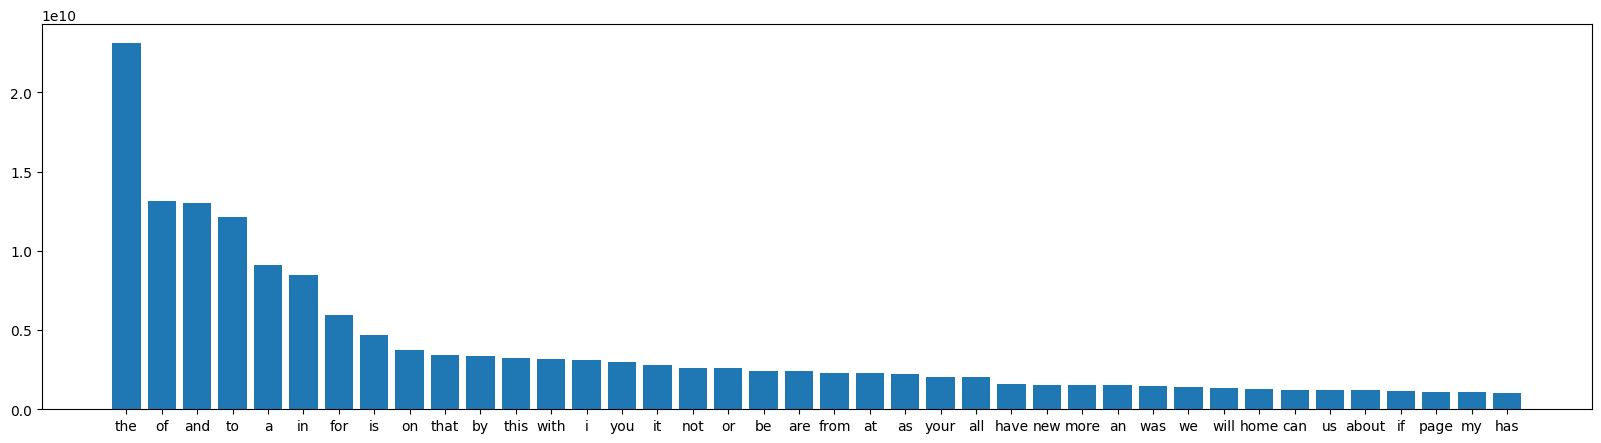

In [22]:
plt.figure(figsize=[20,5])
#plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(w_freq['word'][0:40],w_freq['nInstances'][0:40])
plt.show()

In [23]:

w_freq['word'] = w_freq.word.astype('str')

for word in w_freq['word']:
    if type(word) != str:
        print(word)

w_freq_lens = []

for word in w_freq['word']:
    w_lens = len(word)
    w_freq_lens.append(w_lens)
    
w_freq['length'] = w_freq_lens
    
w_freq.head()


,word,nInstances,length
0,the,23135851162,3
1,of,13151942776,2
2,and,12997637966,3
3,to,12136980858,2
4,a,9081174698,1


In [24]:
w_freq.loc[w_freq['length'] == 3].word[0]

'the'

In [25]:
def wDataFrame(secretCode,iValue=2,fValue=10):

  """
  This function returns a dictionary that contains all the combination of
  characters that fulfill the condition of having a length from
  n = iValue to n = fValue. By default iValue = 2 and fValue = 10
  """
  import pandas as pd
  import re

  nInstances = []
  words = []
  w_set = set()

  for q in range(iValue,fValue+1):
    
    a_set = set(re.findall('[\S]'+'{'+'{0}'.format(q)+'}',
                            secretCode)) #aux set
    w_set = w_set.union(a_set).copy()

  for w in w_set:

    nInstances.append(len(re.findall(w, secretCode)))
    words.append(w)
    
  w_dict = {'word':words,'nInstances':nInstances}
  w_df = pd.DataFrame(w_dict)

  w_sorted_df = w_df.sort_values('nInstances',ascending=False).reset_index().copy()
  w_sorted_df = w_sorted_df.drop("index", axis=1).copy() #column="index"

  return w_sorted_df

In [26]:
def patternFilter(words,selector):
  """
  This function will return an equivalent pattern for working with a regular
  expression that would allow you to use any of the 're' Python Library
  functions on that given pattern. Its input must be a list.
  """
  import re

  len_ref = len(words[selector])
  valPat = ''

  for q in range(0,len_ref):
    if re.fullmatch('[\s]{1}',words[selector][q]):
      valPat += ''
    elif re.fullmatch('[^a-zA-Z]{1}',words[selector][q]):
      valPat += '[\w]{1}'
    else:
      valPat += '{0}'.format(words[selector][q])

  return valPat  

In [27]:
'{0}'.format('hello')
'[\W]{'+'{0}'.format(len(secretCode))+'}'

'[\\W]{211}'

In [32]:
def message_decipher( secretCode, w_freq, control = 3,
                     s_set = set(), l_set = set(), w_set = set() ):

  v = 0
  b = 0
  flag = 1

  while flag != 0:

    w_real = wDataFrame(secretCode, control)
    
    len_ref = len(w_real.word[v])
    pat = patternFilter(w_real.word, v)

    mask = w_freq.word.str.fullmatch(pat) & 1
    w_ref = w_freq[mask].reset_index().drop('index', axis=1).copy()


    if ( not w_ref.empty ) and (len(set(re.findall('[\S]',secretCode))) != 0):

      if w_ref.word[b] not in w_set:

        w_set.add(w_ref.word[b])
        
        for q in range(0, len_ref):

          key1 = '{0}'.format(w_real.word[v][q])
          key2 = '{0}'.format(w_ref.word[b][q])
          
          if (key1 not in s_set) and (key2 not in l_set):
            
            s_set.add(key1)
            l_set.add(key2)

            if q == 0:
              secretCode = re.sub(key1, ' ' + key2, secretCode)
            else:
              secretCode = re.sub(key1, key2, secretCode)
            
          else:
            continue
        
        secretCode = re.sub('{0}'.format(w_ref.word[b]), ' ' + '{0}'.format(w_ref.word[b]) + ' ', secretCode)
        secretCode = re.sub('[\n]{1}[ ]{1,}' + '{0}'.format(w_ref.word[b][0]), '\n' + '{0}'.format(w_ref.word[b][0]), secretCode)
        
        secretCode = re.sub('[ ]{2,}' + '{0}'.format(w_ref.word[b][0]), ' ' + '{0}'.format(w_ref.word[b][0]), secretCode)
        secretCode = re.sub('{0}'.format(w_ref.word[b][len_ref-1]) + '[ ]{2,}', '{0}'.format(w_ref.word[b][len_ref-1]) + ' ', secretCode)
        
      elif (len(w_ref) == 1) and (v < ( len(w_real) - 1 )):
        v += 1
        continue
      elif b < len(w_ref) - 1:
        b += 1
        continue
      else:
        break
      
      b = 0
      v = 0

    else:
      flag = 0
  
  if control != 1:
    control -= 1
    print('Control = %d' % (control) )
    secretCode = message_decipher( secretCode, w_freq, control, s_set, l_set, w_set )
  else:
    print('Done')
    
  return secretCode

In [33]:
message = message_decipher( secretCode, w_freq )

Control = 2
Control = 1
Done


In [34]:
print(message)


a g o o d g l a w w i n t h e c i w h o s w h o w t e l 
i n t h e d e b i l w w e a t f o r t v o n e d e g r e e w 
a n d t h i r t e e n m i n u t e w n o r t h e a w t a n d 
c v n o r t h m a i n c r a n p h w e b e n t h l i m c 
e a w t w i d e w h o o t f r o m t h e l e f t e v e o f 
t h e d e a t h w h e a d a c e e l i n e f r o m t h e 
t r e e t h r o u g h t h e w h o t f i f t v f e e t o u t 

